In [1]:
%matplotlib inline
import importlib

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import ocean_box_model as bx

### Set up and tune model

In [2]:
importlib.reload(bx) # reload to enable modification of module

# instantiate a model
g = bx.two_box_ocean(tau_bio_year=0.5, 
                     h_surf_m=100., 
                     PO4_ocn_mean_mmolm3=2.1)

SST_init = 2. # degC
Psi_init = 40e6 # m^3/s

# compute steady state distribution
state_init = g.equilibrium_solution(SST=SST_init, 
                                    Psi=Psi_init)

Equilibrium state:
Carbon export: 3.403 PgC/yr
PO4 (mmol/m^3)
  surface: 0.037 
  deep: 2.159
O2 (mmol/m^3)
  surface: 339.200
  deep: 21.028


### run the model for time-varying temperature

In [3]:
%%time
# generate forcing 
nyear = 150
time = xr.DataArray(np.arange(0, nyear, 1), 
                    dims=('time'), 
                    attrs={'units': 'years'})
forcing = xr.Dataset(
    {'time': time, 
     'SST': xr.DataArray(np.linspace(SST_init, SST_init+10., nyear), dims=('time')),
     'Psi': xr.DataArray(np.ones(nyear) * Psi_init, dims=('time'))})

ds = g.run(start=0, 
           stop=nyear,
           forcing=forcing,
           state_init=state_init)

ds.info()

xarray.Dataset {
dimensions:
	box = 2 ;
	time = 150 ;

variables:
	float64 PO4(time, box) ;
		PO4:units = mmol/m$^3$ ;
		PO4:long_name = PO4 ;
	float64 O2(time, box) ;
		O2:units = mmol/m$^3$ ;
		O2:long_name = O2 ;
	float64 SST(time) ;
	float64 Psi(time) ;
	float64 NCP(time) ;
		NCP:long_name = NCP ;
		NCP:units = PgC/yr ;
	float64 AOU(time) ;
		AOU:long_name = AOU ;
		AOU:units = mmol/m$^3$ ;
	float64 time(time) ;
		time:units = years ;
	<U7 box(box) ;

// global attributes:
}CPU times: user 912 ms, sys: 38.9 ms, total: 951 ms
Wall time: 953 ms


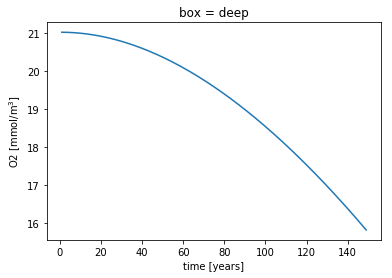

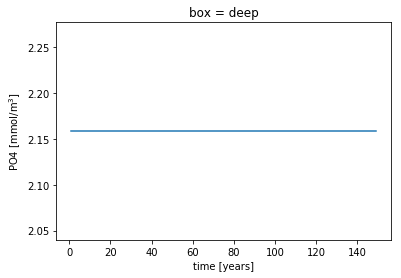

In [4]:
plt.figure()
ds.O2.sel(box='deep').plot()

plt.figure()
ds.PO4.sel(box='deep').plot()

### run the model for time-varying overturning

CPU times: user 901 ms, sys: 25.1 ms, total: 926 ms
Wall time: 883 ms


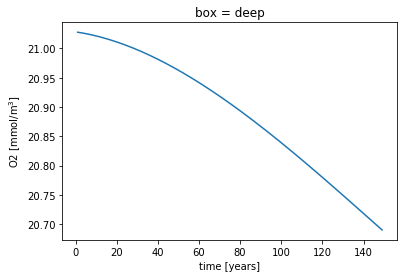

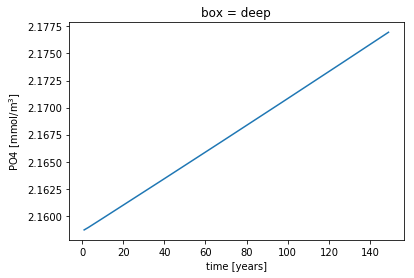

In [5]:
%%time
# generate forcing 
nyear = 150
time = xr.DataArray(np.arange(0, nyear, 1), 
                    dims=('time'), 
                    attrs={'units': 'years'})
forcing = xr.Dataset(
    {'time': time, 
     'SST': xr.DataArray(np.ones(nyear)*2., dims=('time')),
     'Psi': xr.DataArray(np.linspace(40e6, 20e6, nyear), dims=('time'))})

ds = g.run(start=0, 
           stop=nyear,
           forcing=forcing,
           state_init=state_init)

plt.figure()
ds.O2.sel(box='deep').plot()

plt.figure()
ds.PO4.sel(box='deep').plot()